In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC


In [2]:
#Leer los datos
data = pd.read_csv('wdbc.data')
data.head()

,ID,Diagnosis,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,Concave_points1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,Concave_points3,Symmetry3,Fractal_dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
print("\nInformación del dataset:")
print(data.info())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  569 non-null    int64  
 1   Diagnosis           569 non-null    object 
 2   Radius1             569 non-null    float64
 3   Texture1            569 non-null    float64
 4   Perimeter1          569 non-null    float64
 5   Area1               569 non-null    float64
 6   Smoothness1         569 non-null    float64
 7   Compactness1        569 non-null    float64
 8   Concavity1          569 non-null    float64
 9   Concave_points1     569 non-null    float64
 10  Symmetry1           569 non-null    float64
 11  Fractal_dimension1  569 non-null    float64
 12  Radius2             569 non-null    float64
 13  Texture2            569 non-null    float64
 14  Perimeter2          569 non-null    float64
 15  Area2               569 non-nul

In [4]:
print("\nEstadísticas descriptivas:")
print(data.describe())


Estadísticas descriptivas:
                 ID     Radius1    Texture1  Perimeter1        Area1  \
count  5.690000e+02  569.000000  569.000000  569.000000   569.000000   
mean   3.037183e+07   14.127292   19.289649   91.969033   654.889104   
std    1.250206e+08    3.524049    4.301036   24.298981   351.914129   
min    8.670000e+03    6.981000    9.710000   43.790000   143.500000   
25%    8.692180e+05   11.700000   16.170000   75.170000   420.300000   
50%    9.060240e+05   13.370000   18.840000   86.240000   551.100000   
75%    8.813129e+06   15.780000   21.800000  104.100000   782.700000   
max    9.113205e+08   28.110000   39.280000  188.500000  2501.000000   

       Smoothness1  Compactness1  Concavity1  Concave_points1   Symmetry1  \
count   569.000000    569.000000  569.000000       569.000000  569.000000   
mean      0.096360      0.104341    0.088799         0.048919    0.181162   
std       0.014064      0.052813    0.079720         0.038803    0.027414   
min       0.052

In [5]:
print("\nConteo de muestra por una etiqueta especifica:")
print(data['Diagnosis'].value_counts())


Conteo de muestra por una etiqueta especifica:
Diagnosis
B    357
M    212
Name: count, dtype: int64


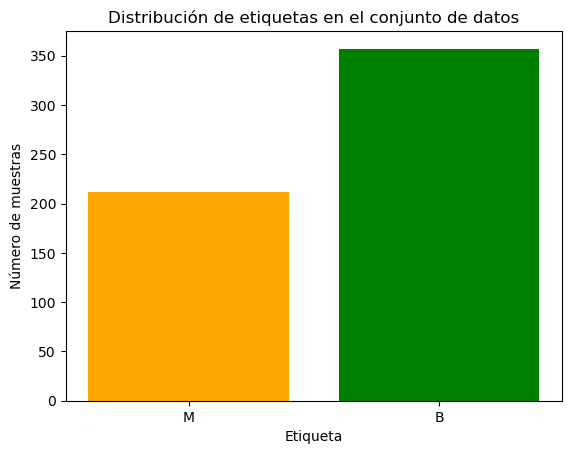

In [6]:
etiquetas = ['M', 'B']
conteo = [212, 357]

plt.bar(etiquetas, conteo, color=['orange', 'green'])
plt.xlabel('Etiqueta')
plt.ylabel('Número de muestras')
plt.title('Distribución de etiquetas en el conjunto de datos')
plt.show()

In [7]:
if data.isna().any().any():
    print("Hay valores nulos en el DataFrame.")
else:
    print("No hay valores nulos en el DataFrame.")

No hay valores nulos en el DataFrame.


In [8]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
data_imputed = imputer.fit_transform(data.iloc[:, 2:])

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

In [10]:
pca = PCA(n_components=30)  # Especifica el número de componentes deseados, en este caso 100
data_pca = pca.fit_transform(data_scaled)

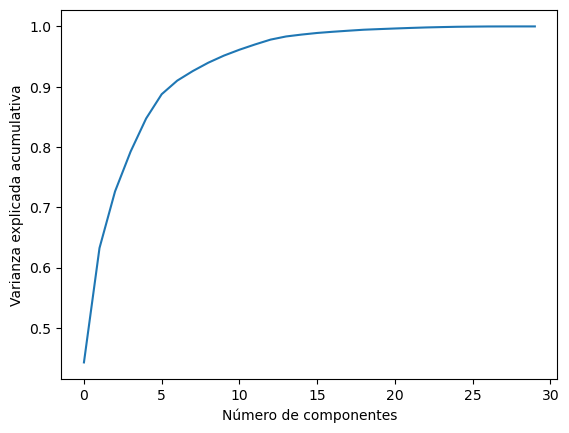

In [11]:
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulativa')
plt.show()

In [12]:
X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']
# Codificar la etiqueta
y = y.map({'M': 0, 'B': 1})

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

In [15]:
print(f"Varianza explicada acumulada: {np.sum(pca.explained_variance_ratio_)}")
print(f"Número de componentes seleccionados: {pca.n_components_}")

Varianza explicada acumulada: 0.9531680557191975
Número de componentes seleccionados: 11


In [16]:
X_train, X_temp, y_train, y_temp = train_test_split(X_pca, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [17]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=60)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=60)

In [18]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [19]:
def plot_confusion_matrix(cm, title='Matriz de Confusión'):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
    plt.title(title)
    plt.ylabel('Verdaderos')
    plt.xlabel('Predicciones')
    plt.show()

In [20]:
rf_test_predictions = rf_model.predict(X_test)
print("Evaluación final de Random Forest en el conjunto de prueba:")
print(classification_report(y_test, rf_test_predictions))

Evaluación final de Random Forest en el conjunto de prueba:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        26
           1       0.98      0.98      0.98        60

    accuracy                           0.98        86
   macro avg       0.97      0.97      0.97        86
weighted avg       0.98      0.98      0.98        86



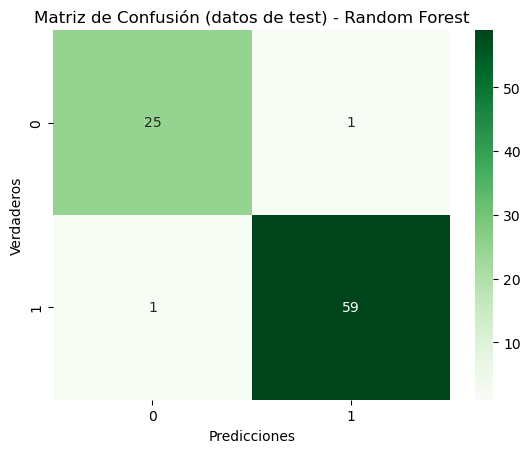

In [21]:
cm_rf = confusion_matrix(y_test, rf_test_predictions)
plot_confusion_matrix(cm_rf, title='Matriz de Confusión (datos de test) - Random Forest')

In [22]:
rf_test_predictions = rf_model.predict(X_val)
print("Evaluación final de Random Forest en el conjunto de prueba:")
print(classification_report(y_val, rf_test_predictions))

Evaluación final de Random Forest en el conjunto de prueba:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93        37
           1       0.96      0.94      0.95        48

    accuracy                           0.94        85
   macro avg       0.94      0.94      0.94        85
weighted avg       0.94      0.94      0.94        85



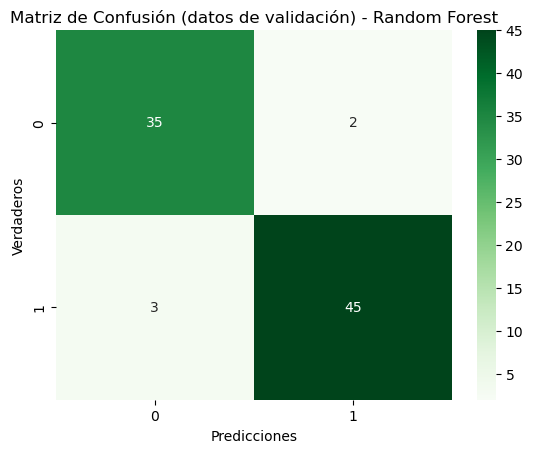

In [23]:
cm_rf = confusion_matrix(y_val, rf_test_predictions)
plot_confusion_matrix(cm_rf, title='Matriz de Confusión (datos de validación) - Random Forest')

In [24]:
xgb_test_predictions = xgb_model.predict(X_test)
print("Evaluación final de XGBoost en el conjunto de prueba:")
print(classification_report(y_test, xgb_test_predictions))

Evaluación final de XGBoost en el conjunto de prueba:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        26
           1       0.98      1.00      0.99        60

    accuracy                           0.99        86
   macro avg       0.99      0.98      0.99        86
weighted avg       0.99      0.99      0.99        86



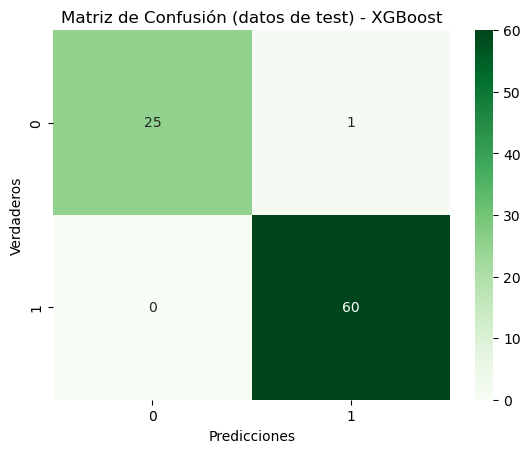

In [25]:
cm_xgb = confusion_matrix(y_test, xgb_test_predictions)
plot_confusion_matrix(cm_xgb, title='Matriz de Confusión (datos de test) - XGBoost')

In [26]:
xgb_test_predictions = xgb_model.predict(X_val)
print("Evaluación final de XGBoost en el conjunto de prueba:")
print(classification_report(y_val, xgb_test_predictions))

Evaluación final de XGBoost en el conjunto de prueba:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        37
           1       0.98      0.96      0.97        48

    accuracy                           0.96        85
   macro avg       0.96      0.97      0.96        85
weighted avg       0.97      0.96      0.96        85



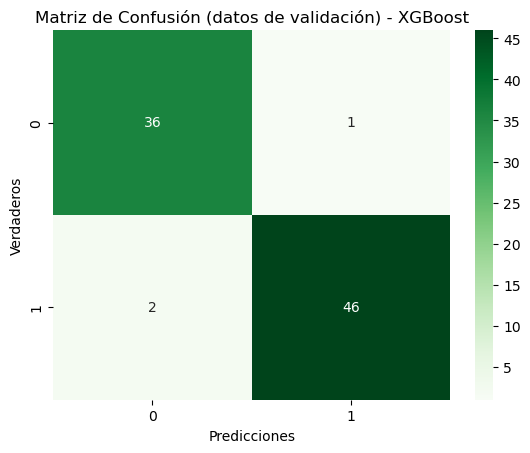

In [27]:
cm_xgb = confusion_matrix(y_val, xgb_test_predictions)
plot_confusion_matrix(cm_xgb, title='Matriz de Confusión (datos de validación) - XGBoost')

In [29]:
y_probs_rf = rf_model.predict_proba(X_test)[:, 1]  # Obtener probabilidades de la clase positiva
y_probs_xgb = xgb_model.predict_proba(X_test)[:, 1]
auc_roc_rf = roc_auc_score(y_test, y_probs_rf)
auc_roc_xgb = roc_auc_score(y_test, y_probs_xgb)
print(f"AUC-ROC (Random Forest): {auc_roc_rf}")
print(f"AUC-ROC (XGBoost): {auc_roc_xgb}")

AUC-ROC (Random Forest): 0.9974358974358973
AUC-ROC (XGBoost): 1.0


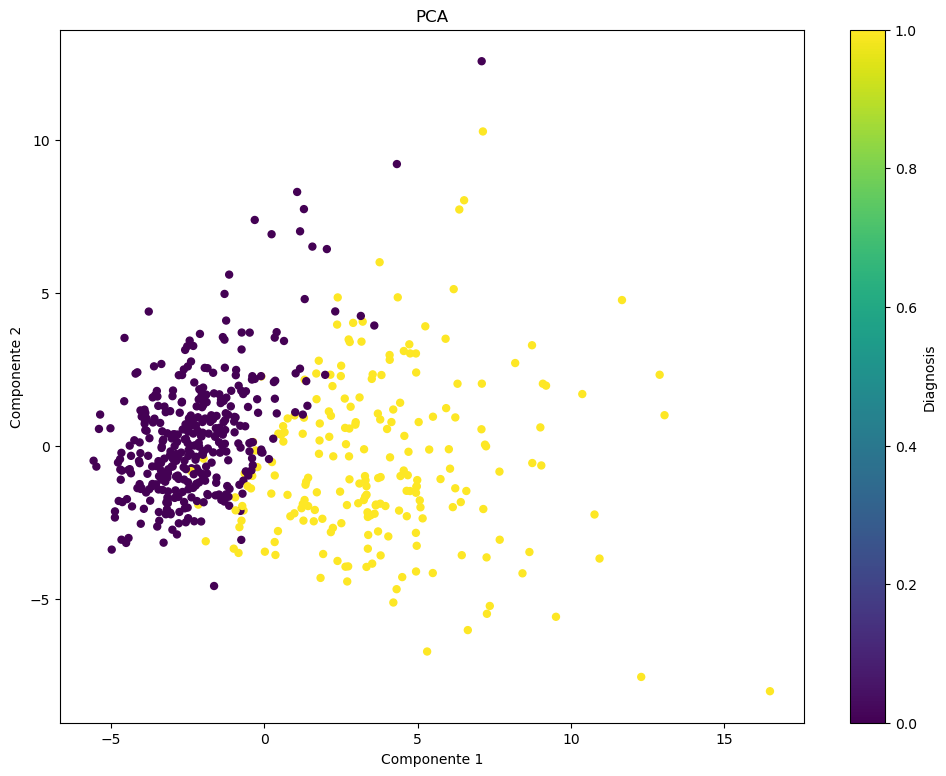

In [30]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = data.iloc[:, 1:-4]  
y = data['Diagnosis']
y = y.map({'M': 1, 'B': 0})

pca = PCA(n_components=2)

plt.figure(figsize=(12, 9))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=25, alpha=1.0)
plt.title('PCA')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.colorbar(label='Diagnosis')
plt.show()

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

print("Conjunto de entrenamiento:", X_train.shape, y_train.shape)
print("Conjunto de validación:", X_val.shape, y_val.shape)
print("Conjunto de prueba:", X_test.shape, y_test.shape)

Conjunto de entrenamiento: (278, 27) (278,)
Conjunto de validación: (120, 27) (120,)
Conjunto de prueba: (171, 27) (171,)
